In [ ]:
import sparkmobility as sm
from sparkmobility.processing.stay_detection import StayDetection
sm.config['CORES'] = 48
sm.config['MEMORY'] = 512
sm.config['LOG_LEVEL'] = 'ERROR'

## Stay Detection

In [ ]:
longitude = [-118.9448, -117.6463]
latitude = [33.7037, 34.3373]

input_path = "/home/albert/raw_data/"

output_path = "example_results"


columns = {
    "caid": "caid",
    "latitude": "latitude",
    "longitude": "longitude",
    "utc_timestamp": "utc_timestamp"
}

stays = StayDetection(longitude=longitude, latitude=latitude, columns=columns,
                startTimestamp="2019-01-01 00:00:00",
                endTimestamp="2025-01-31 23:59:59", input_path=input_path,
                timeZone="America/Los_Angeles",
                output_path=output_path, timeFormat="UNIX")

stays.get_stays(hexResolution=10)
stays.get_home_work_od_matrix(7)
stays.summarize()

## Visualization

In [ ]:
from sparkmobility.utils.session import create_spark_session
import pyspark.sql.functions as F

In [ ]:
# Plot individual trajectories
from sparkmobility.visualization.individual import plot_trajectories
dl = create_spark_session().read.parquet(f"{output_path}/StayPoints")
dl = dl.filter(F.col("caid")=="0006e4cac5385960141fee505fbb73922c27309b34c45a8c5bb0bf03ace2879c").toPandas()
plot_trajectories(dl)

Config({'CORES': 48, 'MEMORY': 512, 'LOG_LEVEL': 'ERROR', 'SPARKMOBILITY_JAR': '/data_1/albert/sparkmobility-testing/sparkmobility/lib/sparkmobility010.jar', 'TEMP_DIR': '/data_jbod/personal/albert/tmp'})


Config({'CORES': 48, 'MEMORY': 512, 'LOG_LEVEL': 'ERROR', 'SPARKMOBILITY_JAR': '/data_1/albert/sparkmobility-testing/sparkmobility/lib/sparkmobility010.jar', 'TEMP_DIR': '/data_jbod/personal/albert/tmp'})
Config({'CORES': 48, 'MEMORY': 512, 'LOG_LEVEL': 'ERROR', 'SPARKMOBILITY_JAR': '/data_1/albert/sparkmobility-testing/sparkmobility/lib/sparkmobility010.jar', 'TEMP_DIR': '/data_jbod/personal/albert/tmp'})
Config({'CORES': 48, 'MEMORY': 512, 'LOG_LEVEL': 'ERROR', 'SPARKMOBILITY_JAR': '/data_1/albert/sparkmobility-testing/sparkmobility/lib/sparkmobility010.jar', 'TEMP_DIR': '/data_jbod/personal/albert/tmp'})


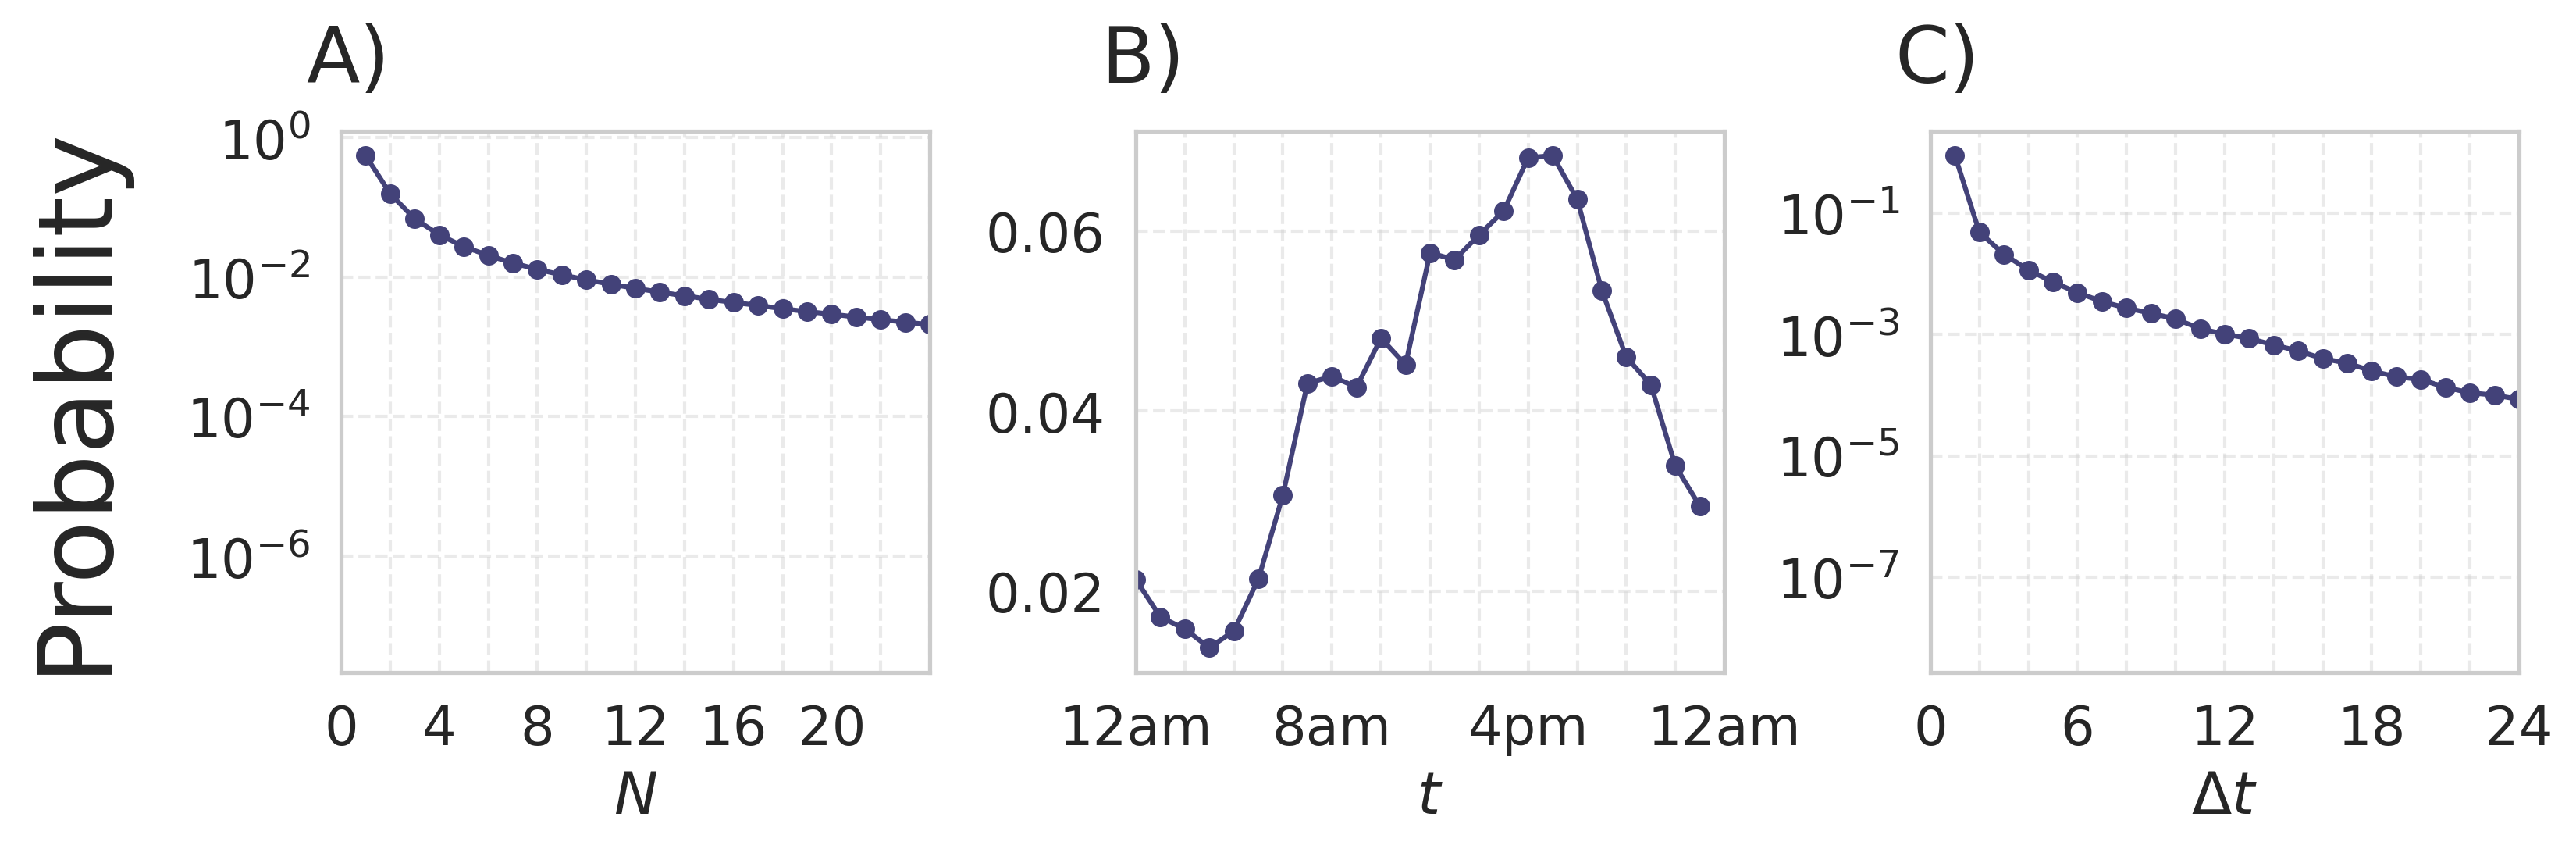

In [ ]:
# Plot mobility distributions
from sparkmobility.visualization.population import plot_mobility_distributions
fig, ax = plot_mobility_distributions(output_path)

In [ ]:
# Plot home location distribution
from sparkmobility.visualization.population import plot_count

df = create_spark_session().read.parquet(f"{output_path}/StayPointsWithHomeWork")
home_loc = df.groupBy("caid").agg({"home_h3_index": "first"}).withColumnRenamed("first(home_h3_index)", "home_h3_index")
home_pd = home_loc.groupBy("home_h3_index").count().toPandas()

home_pd = home_pd.dropna()
home_pd = home_pd[home_pd['home_h3_index']!='None'].reset_index(drop=True)

plot_count(home_pd, "home_h3_index", 6)

Config({'CORES': 48, 'MEMORY': 512, 'LOG_LEVEL': 'ERROR', 'SPARKMOBILITY_JAR': '/data_1/albert/sparkmobility-testing/sparkmobility/lib/sparkmobility010.jar', 'TEMP_DIR': '/data_jbod/personal/albert/tmp'})
